# Relajación expectral

In [1]:
%matplotlib inline
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt
from operator import itemgetter
from itertools import combinations

[]

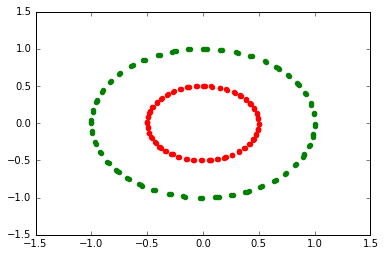

In [2]:
A = np.zeros((100,2))
for i, x in enumerate(range(0,100)):
    A[i,0] = sin(x)
    A[i,1] = cos(x)
    
B = np.zeros((100,2))
for i, x in enumerate(range(0,100)):
    B[i,0] = sin(x) * 0.5
    B[i,1] = cos(x) * 0.5 

plt.scatter(A[:,0], A[:,1], color='green')
plt.scatter(B[:,0], B[:,1], color='red')

plt.plot()

In [5]:
C = np.concatenate((A,B))
G = np.zeros((200,200))

euc = lambda x,y: np.linalg.norm(x-y)

for (x,y) in combinations(zip((range(len(C))),C),2):
    dist = euc(x[1],y[1])
    if dist < 0.4: 
        ker = np.exp(-(1./2)*(dist**2/0.01))
        G[x[0],y[0]] = ker
        G[y[0],x[0]] = ker

print G

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [6]:
D = np.array( np.diag(G.sum(0)) )

print D

[[ 3.53620813  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          3.53620813  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          3.53620813 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  7.47523268  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          7.47523268  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          7.47523268]]


In [7]:
L = D - G

print L

[[ 3.53620813  0.          0.         ...,  0.          0.          0.        ]
 [ 0.          3.53620813  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          3.53620813 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  7.47523268  0.          0.        ]
 [ 0.          0.          0.         ...,  0.          7.47523268  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          7.47523268]]


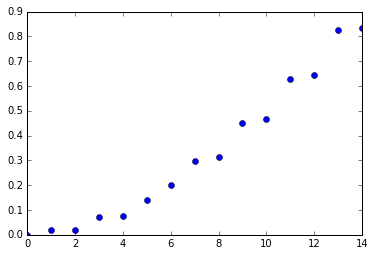

In [8]:
eig, evec = np.linalg.eig(L)

N = np.array([v[1] for v in sorted(zip(eig, evec), key=itemgetter(0))[0:3] ]).T

NA = N[:100]
NB = N[100:]

plt.plot(sorted(eig[:15]),'o')

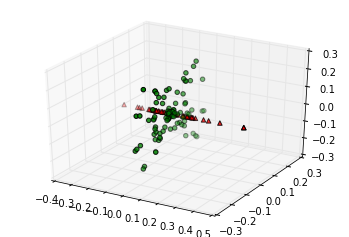

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(NA[:,0], NA[:,1], NA[:,2], c='g')
ax.scatter(NB[:,0], NB[:,1], NB[:,2], c='r', marker='^')

plt.show()

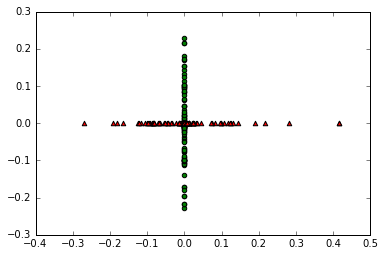

In [10]:
plt.scatter(NA[:,0], NA[:,1], c='g')
plt.scatter(NB[:,0], NB[:,1], c='r', marker='^')
plt.show()

In [11]:
print NA[0], NB[0]
print NA[1], NB[1]
print NA[2], NB[2]

[ 0.  -0.1 -0.1] [-0.1  0.   0. ]
[ 0.          0.09791315  0.13875933] [ 0.09819558  0.          0.        ]
[ 0.         -0.10686427  0.0227647 ] [ 0.10640018  0.          0.        ]
